# Análise e Regressão de Indicadores Educacionais
Análise Exploratória e criação de algoritmo de regressão linear simples e multivariada dos dados do Índice de Desenvolvimento da Educação Básica de 2015 (Ideb) e das notas da Prova São Paulo de 2017 referente às escolas municipais da Prefeitura de São Paulo.

Link do datasets:

Ideb:http://dados.prefeitura.sp.gov.br/pt_PT/dataset/ideb-e-prova-brasil-na-rede-municipal-de-ensino

Prova SP:http://dados.prefeitura.sp.gov.br/pt_PT/dataset/microdados-psp

### Parte 0 - Importando pacotes 

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")

### Chamando a tabela do Ideb

In [3]:
df = pd.read_csv("ideb_sp_2015.csv", sep =";")

### Parte 1 - Se familarizando com o dataset-ideb 

In [4]:
#Verificar o começo da tabela
print(df.head(10))

  Sigla da UF  Código do Município Nome do Município  Código da Escola  \
0          SP              3550308         São Paulo          35056996   
1          SP              3550308         São Paulo          35246360   
2          SP              3550308         São Paulo          35053173   
3          SP              3550308         São Paulo          35053284   
4          SP              3550308         São Paulo          35098462   
5          SP              3550308         São Paulo          35053181   
6          SP              3550308         São Paulo          35053144   
7          SP              3550308         São Paulo          35053156   
8          SP              3550308         São Paulo          35053132   
9          SP              3550308         São Paulo          35281438   

   CD_UNIDADE_EDUCACAO      DRE                         Nome da Escola    NSE  \
0                19262  Butantã                       CEU EMEF BUTANTA  54.75   
1                19551 

In [5]:
#Verificar os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sigla da UF                556 non-null    object 
 1   Código do Município        556 non-null    int64  
 2   Nome do Município          556 non-null    object 
 3   Código da Escola           556 non-null    int64  
 4   CD_UNIDADE_EDUCACAO        556 non-null    int64  
 5   DRE                        556 non-null    object 
 6   Nome da Escola             556 non-null    object 
 7   NSE                        535 non-null    float64
 8   Rede                       556 non-null    object 
 9   taxa_aprov_1_a_5           550 non-null    float64
 10  taxa_aprov_1               547 non-null    float64
 11  taxa_aprov_2               548 non-null    float64
 12  taxa_aprov_3               548 non-null    float64
 13  taxa_aprov_4               550 non-null    float64

In [6]:
#Verificar nulos
print(df.isnull().sum())

Sigla da UF                   0
Código do Município           0
Nome do Município             0
Código da Escola              0
CD_UNIDADE_EDUCACAO           0
DRE                           0
Nome da Escola                0
NSE                          21
Rede                          0
taxa_aprov_1_a_5              6
taxa_aprov_1                  9
taxa_aprov_2                  8
taxa_aprov_3                  8
taxa_aprov_4                  6
taxa_aprov_5                  7
indicador_rendimento_(P)      6
provabr_matematica            7
provabr_portugues             7
provabr_media_padronizada     7
IDEB_2015_(N x P)             7
dtype: int64


Lidando com os nulos com alternativas ao deletamento de linhas

In [7]:
#Usando a moda para completar os valores de Nivel Socioeconômico
df['NSE'].fillna(df['NSE'].mode()[0], inplace = True)

In [8]:
#Usando a mediana para preencher os outros nulos
df_cols = ['taxa_aprov_1_a_5','taxa_aprov_1','taxa_aprov_2','taxa_aprov_3','taxa_aprov_4','taxa_aprov_5','indicador_rendimento_(P)',
           'provabr_matematica','provabr_portugues','provabr_media_padronizada','IDEB_2015_(N x P)']
for x in df_cols:
    df[x].fillna(df[x].median(), inplace=True)

In [9]:
#Resumo estatístico
print(df.describe())

       Código do Município  Código da Escola  CD_UNIDADE_EDUCACAO         NSE  \
count                556.0      5.560000e+02           556.000000  556.000000   
mean             3550308.0      3.514529e+07         61564.838129   53.166942   
std                    0.0      1.346576e+05         38525.555774    1.864105   
min              3550308.0      3.505302e+07           108.000000   48.340000   
25%              3550308.0      3.505441e+07         19360.750000   51.930000   
50%              3550308.0      3.505761e+07         93072.000000   53.120000   
75%              3550308.0      3.523398e+07         94457.000000   54.172500   
max              3550308.0      3.556705e+07         99792.000000   59.250000   

       taxa_aprov_1_a_5  taxa_aprov_1  taxa_aprov_2  taxa_aprov_3  \
count        556.000000    556.000000    556.000000    556.000000   
mean          97.171942     98.621403     98.756295     92.108273   
std            2.079294      1.775395      1.698663      7.2126

In [10]:
#Eliminando colunas pouco relevantes
df = df.drop(['Código do Município','Código da Escola'],axis=1)

### Primeiras visualizações 

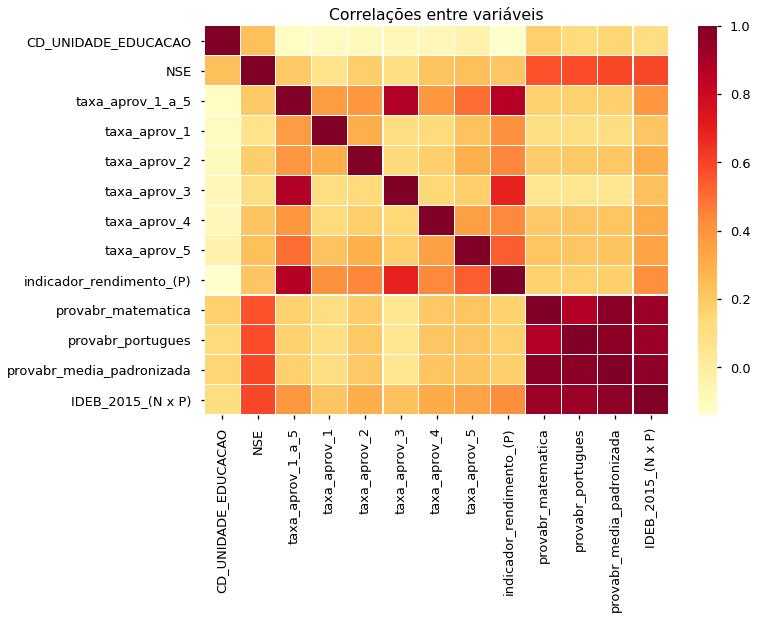

In [13]:
corr=df.corr()
sns.heatmap(corr,cmap = "YlOrRd",linewidths=0.1)
plt.title('Correlações entre variáveis')
plt.show()

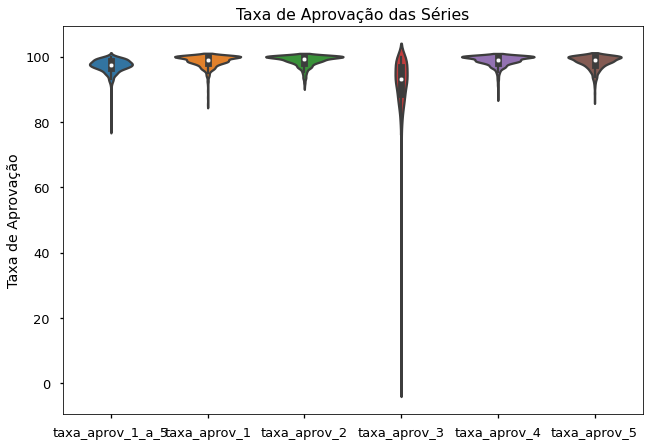

In [15]:
#Criando gráfico de violino da distribuição da aprovação das séries
taxa_aprov = df.drop(['CD_UNIDADE_EDUCACAO','NSE','indicador_rendimento_(P)','provabr_matematica','provabr_portugues','provabr_media_padronizada','IDEB_2015_(N x P)'],axis=1)
sns.violinplot(data=taxa_aprov)
plt.title('Taxa de Aprovação das Séries')
plt.ylabel('Taxa de Aprovação')
plt.show()

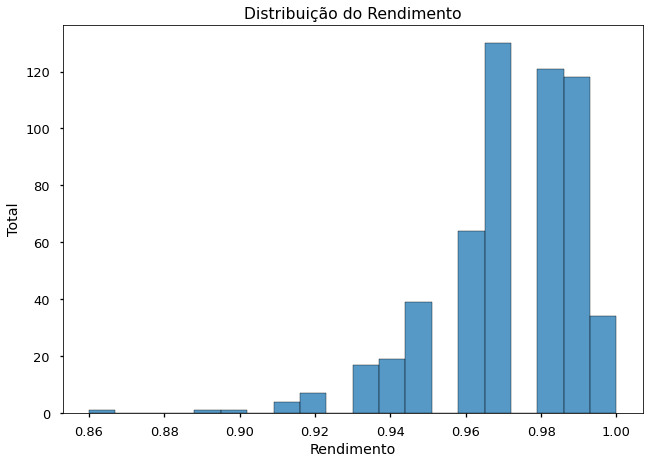

In [17]:
#Distribuição do Rendimento
sns.histplot(data=df['indicador_rendimento_(P)'])
plt.title('Distribuição do Rendimento')
plt.ylabel('Total')
plt.xlabel('Rendimento')
plt.show()

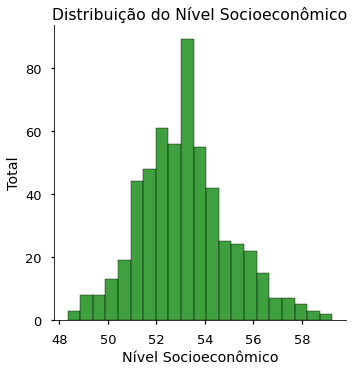

In [19]:
#Distribuição no Nível Socioeconômico
sns.displot(data=df['NSE'],color='green')
plt.title('Distribuição do Nível Socioeconômico')
plt.xlabel('Nível Socioeconômico')
plt.ylabel('Total')
plt.show()

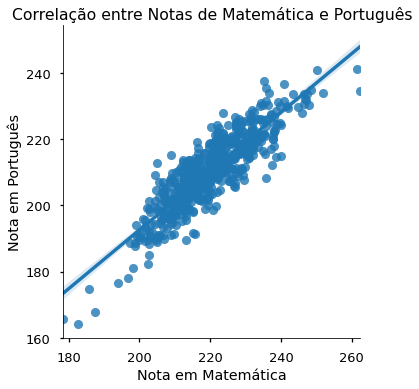

In [20]:
#Scatterplot da distribuição das notas em português e matemática
sns.lmplot(x='provabr_matematica',y='provabr_portugues',data=df)
plt.title('Correlação entre Notas de Matemática e Português')
plt.xlabel('Nota em Matemática')
plt.ylabel('Nota em Português')
plt.show()

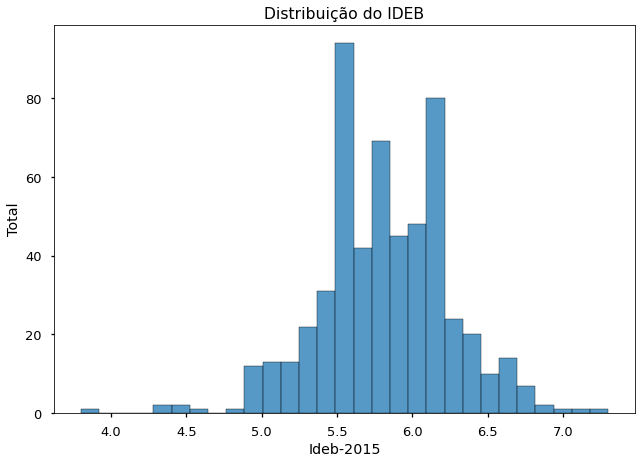

In [22]:
#Histrograma do Ideb
sns.histplot(data=df['IDEB_2015_(N x P)'])
plt.title('Distribuição do IDEB')
plt.xlabel('Ideb-2015')
plt.ylabel('Total')
plt.show()

### Parte 2 - Se familiarizando com dataset-prova_sp

In [23]:
#Importando o 2º documento
df_p = pd.read_csv("MCD_PSP_2017.csv", sep =";")

In [25]:
#Verificando o começo da tabela
print(df_p.head(5))

    ANO  CD_UNIDADE_EDUCACAO TIPO_ESCOLA DRE NOME_DISTRITO  CD_TURMA  \
0  2017                95087        EMEF  PE     AGUA RASA    140793   
1  2017                95087        EMEF  PE     AGUA RASA    140793   
2  2017                95087        EMEF  PE     AGUA RASA    140793   
3  2017                95087        EMEF  PE     AGUA RASA    140793   
4  2017                95087        EMEF  PE     AGUA RASA    140793   

   CD_TURNO DESC_TURNO  CD_SERIE    DESC_SERIE  ... PROFICIENCIA_CIE NOTA_RED  \
0       3.0      TARDE       112  C.I 3.ANO F9  ...              217        0   
1       3.0      TARDE       112  C.I 3.ANO F9  ...            117,5        0   
2       3.0      TARDE       112  C.I 3.ANO F9  ...            188,8        0   
3       3.0      TARDE       112  C.I 3.ANO F9  ...               97      NaN   
4       3.0      TARDE       112  C.I 3.ANO F9  ...              102      NaN   

  NIVEL_LP  DESC_NIVEL_LP NIVEL_MAT    DESC_NIVEL_MAT NIVEL_CIE  \
0      4.0   

In [26]:
#Verificando os tipos de dados das colunas
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227005 entries, 0 to 227004
Data columns (total 57 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ANO                  227005 non-null  int64  
 1   CD_UNIDADE_EDUCACAO  227005 non-null  int64  
 2   TIPO_ESCOLA          227005 non-null  object 
 3   DRE                  227005 non-null  object 
 4   NOME_DISTRITO        227005 non-null  object 
 5   CD_TURMA             227005 non-null  int64  
 6   CD_TURNO             226590 non-null  float64
 7   DESC_TURNO           227005 non-null  object 
 8   CD_SERIE             227005 non-null  int64  
 9   DESC_SERIE           227005 non-null  object 
 10  MODALIDADE           227005 non-null  object 
 11  MODALIDADE_SEGMENTO  227005 non-null  object 
 12  NOME_TURMA           227005 non-null  object 
 13  CD_CICLO_ENSINO      227005 non-null  int64  
 14  DESC_CICLO_ENSINO    227005 non-null  object 
 15  CD_ALUNO_SME     

In [27]:
#Deletando colunas pouco relevante segundo o Dicionário de Dados (Verificar Link)
df_p = df_p.drop(['ANO','DRE','CD_TURMA','CD_TURNO','DESC_TURNO','CD_SERIE','NOME_TURMA','CD_CICLO_ENSINO','DESC_CICLO_ENSINO',
                  'CD_ALUNO_SME','CD_INEP_ALUNO','POSSUI_NEE','DESC_TP_PROVA','PROVA_LP','CADERNO_LP','PROVA_MAT',
                  'CADERNO_MAT','PROVA_CIE','CADERNO_CIE','VETOR_LP','VETOR_CORRIGIDO_LP','VETOR_MAT','VETOR_CORRIGIDO_MAT',
                  'VETOR_CIE','VETOR_CORRIGIDO_CIE','PESO_ALUNO_LP','PESO_ALUNO_MAT','PESO_ALUNO_CIE','PESO_ALUNO_RED'],axis=1)

In [28]:
#Verificando nulos
print(df_p.isnull().sum())

CD_UNIDADE_EDUCACAO        0
TIPO_ESCOLA                0
NOME_DISTRITO              0
DESC_SERIE                 0
MODALIDADE                 0
MODALIDADE_SEGMENTO        0
IN_PRESENCA_LP             0
IN_PRESENCA_MAT            0
IN_PRESENCA_CIE            0
IN_PRESENCA_RED            0
ACERTOS_ALUNO_LP       28926
ACERTOS_ALUNO_MAT      28320
ACERTOS_ALUNO_CIE      37890
PER_ALUNO_LP           28926
PER_ALUNO_MAT          28320
PER_ALUNO_CIE          37890
PROFICIENCIA_LP        28926
PROFICIENCIA_MAT       28320
PROFICIENCIA_CIE       37890
NOTA_RED               37734
NIVEL_LP               28926
DESC_NIVEL_LP          28926
NIVEL_MAT              28320
DESC_NIVEL_MAT         28320
NIVEL_CIE              37890
DESC_NIVEL_CIE         37890
NIVEL_RED              37734
DESC_NIVEL_RED         37734
dtype: int64


In [29]:
#Verificando as presenças nas provas antes de lidar com os valores nulos

#Criando dataset com as presenças
num_pre = {}
presenca = ['IN_PRESENCA_LP','IN_PRESENCA_MAT','IN_PRESENCA_CIE','IN_PRESENCA_RED']

for x in presenca:
    num_pre[x] = df_p[x].value_counts().tolist()
pres = pd.DataFrame(data=num_pre)
print(pres)

   IN_PRESENCA_LP  IN_PRESENCA_MAT  IN_PRESENCA_CIE  IN_PRESENCA_RED
0          198079           198685           189115           189271
1           28926            28320            37890            37734


In [30]:
#Transpondo para visualização
pres= pres.transpose()

In [32]:
#Criando as categorias
indx = np.arange(len(pres))

#1ª coluna
presentes = pres.iloc[:,0]

#2ª coluna
ausentes = pres.iloc[:,1]

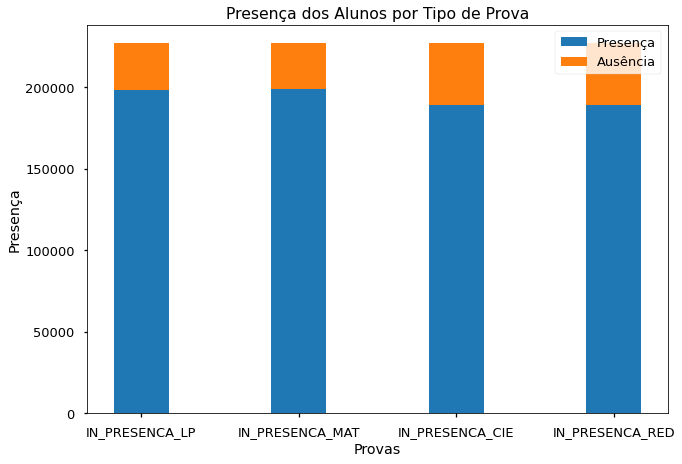

In [33]:
#Gráfico de barras da presença geral nas provas
prese = plt.bar(x=indx,height=presentes,width=0.35,label='Presença')
ausen = plt.bar(x=indx,height=ausentes,width=0.35,bottom=presentes,label='Ausência')
plt.xlabel('Provas')
plt.ylabel('Presença')
plt.xticks(indx,presenca)
plt.title('Presença dos Alunos por Tipo de Prova')
plt.legend()
plt.show()

Podemos assumir que os valores nulos nas outras colunas são, na verdade, zeros equivalente à ausencia do aluno em determinada prova.

In [34]:
#Substituindo nulos por zeros
df_p = df_p.fillna(0)
print(df_p.isnull().sum())

CD_UNIDADE_EDUCACAO    0
TIPO_ESCOLA            0
NOME_DISTRITO          0
DESC_SERIE             0
MODALIDADE             0
MODALIDADE_SEGMENTO    0
IN_PRESENCA_LP         0
IN_PRESENCA_MAT        0
IN_PRESENCA_CIE        0
IN_PRESENCA_RED        0
ACERTOS_ALUNO_LP       0
ACERTOS_ALUNO_MAT      0
ACERTOS_ALUNO_CIE      0
PER_ALUNO_LP           0
PER_ALUNO_MAT          0
PER_ALUNO_CIE          0
PROFICIENCIA_LP        0
PROFICIENCIA_MAT       0
PROFICIENCIA_CIE       0
NOTA_RED               0
NIVEL_LP               0
DESC_NIVEL_LP          0
NIVEL_MAT              0
DESC_NIVEL_MAT         0
NIVEL_CIE              0
DESC_NIVEL_CIE         0
NIVEL_RED              0
DESC_NIVEL_RED         0
dtype: int64


In [35]:
#Corrigindo erro de leitura nas colunas de nível
df_p = df_p.replace('B�sico', 'Básico', regex=True)
df_p = df_p.replace('Avan�ado', 'Avançado', regex=True)

In [36]:
#Trocando virgulas por pontos para compreender os números como floats e não como strings
df_p = df_p.replace(',','.', regex=True)

#### Observação
Para as linguagens de programação entende-se o ponto final "." como o separador das casas decimais, já em português e no excel em linguagem regional em PT-BR a vírgula "," toma esse papel.
Por isso realizamos a mudança dos símbolos para realizar cálculos com os valores.

In [37]:
#Trocando o tipo de valores das colunas numéricas
colunas = ['PER_ALUNO_LP','PER_ALUNO_MAT','PER_ALUNO_CIE','PROFICIENCIA_LP','PROFICIENCIA_MAT','PROFICIENCIA_CIE']
for x in colunas:
    df_p[x] = df_p[x].astype(float)

##### Explorandos os valores para além dos nulos 

In [39]:
#Verificando o progresso já feito
print(df_p.head())

   CD_UNIDADE_EDUCACAO TIPO_ESCOLA NOME_DISTRITO    DESC_SERIE MODALIDADE  \
0                95087        EMEF     AGUA RASA  C.I 3.ANO F9       FUND   
1                95087        EMEF     AGUA RASA  C.I 3.ANO F9       FUND   
2                95087        EMEF     AGUA RASA  C.I 3.ANO F9       FUND   
3                95087        EMEF     AGUA RASA  C.I 3.ANO F9       FUND   
4                95087        EMEF     AGUA RASA  C.I 3.ANO F9       FUND   

  MODALIDADE_SEGMENTO  IN_PRESENCA_LP  IN_PRESENCA_MAT  IN_PRESENCA_CIE  \
0               Fund1               1                1                1   
1               Fund1               1                1                1   
2               Fund1               1                1                1   
3               Fund1               1                1                1   
4               Fund1               1                1                1   

   IN_PRESENCA_RED  ...  PROFICIENCIA_CIE  NOTA_RED  NIVEL_LP  DESC_NIVEL_LP  \
0     

In [40]:
#Respondendo perguntas básicas do dataset
print('Qual é o número de unidades educacionais?')
print(df_p['CD_UNIDADE_EDUCACAO'].nunique())
print(' ')

print('Quais são os tipos de unidade??')
print(df_p['TIPO_ESCOLA'].value_counts())
print(' ')

print('Quais são os tipos de modalidade??')
print(df_p['MODALIDADE'].value_counts())
print(' ')

print('Quais são os tipos de segmento de modalidade??')
print(df_p['MODALIDADE_SEGMENTO'].value_counts())
print(' ')

print('Quais são as séries?')
print(df_p['DESC_SERIE'].value_counts())
print(' ')

Qual é o número de unidades educacionais?
561
 
Quais são os tipos de unidade??
EMEF        202101
CEU EMEF     21464
EMEFM         2867
EMEBS          573
Name: TIPO_ESCOLA, dtype: int64
 
Quais são os tipos de modalidade??
FUND     226398
ESPEC       607
Name: MODALIDADE, dtype: int64
 
Quais são os tipos de segmento de modalidade??
Fund1    121957
Fund2    105048
Name: MODALIDADE_SEGMENTO, dtype: int64
 
Quais são as séries?
C.III 7.ANO F9    53936
C.I 3.ANO F9      52101
C.II 5.ANO F9     50893
C.II 6.ANO F9     19000
C.II 4.ANO F9     18963
C.III 8.ANO F9    18836
C.III 9.ANO F9    13276
Name: DESC_SERIE, dtype: int64
 


In [41]:
print('Qual é a prova com mais abaixo do básico e avançado?')
nivel_pro = {}
nivel = ['DESC_NIVEL_LP','DESC_NIVEL_MAT','DESC_NIVEL_CIE','DESC_NIVEL_RED']
for x in nivel:
    nivel_pro[x] = df_p[x].value_counts().tolist()
nivel_pro = pd.DataFrame(data=nivel_pro)
nivel_pro.index = ['Adequado','Básico','Abaixo do Básico','Ausente','Avançado']
print(nivel_pro)

Qual é a prova com mais abaixo do básico e avançado?
                  DESC_NIVEL_LP  DESC_NIVEL_MAT  DESC_NIVEL_CIE  \
Adequado                  72761           85683           77830   
Básico                    72310           63319           65100   
Abaixo do Básico          32582           41410           39378   
Ausente                   28926           28320           37890   
Avançado                  20426            8273            6807   

                  DESC_NIVEL_RED  
Adequado                   70083  
Básico                     57475  
Abaixo do Básico           53354  
Ausente                    37734  
Avançado                    8359  


### Segundas Visualizações

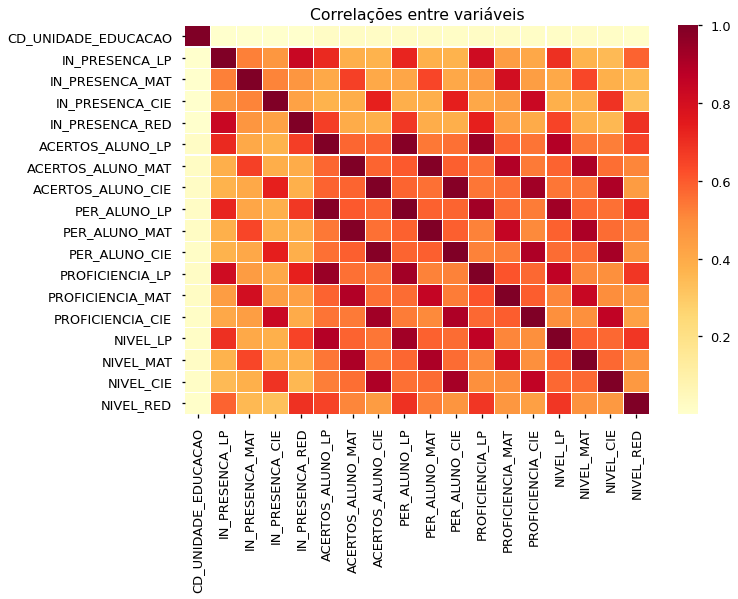

In [42]:
#Tabela de calor da correlação entre variáveis
corr= df_p.corr()
sns.heatmap(corr,cmap = "YlOrRd",linewidths=0.1)
plt.title('Correlações entre variáveis')
plt.show()

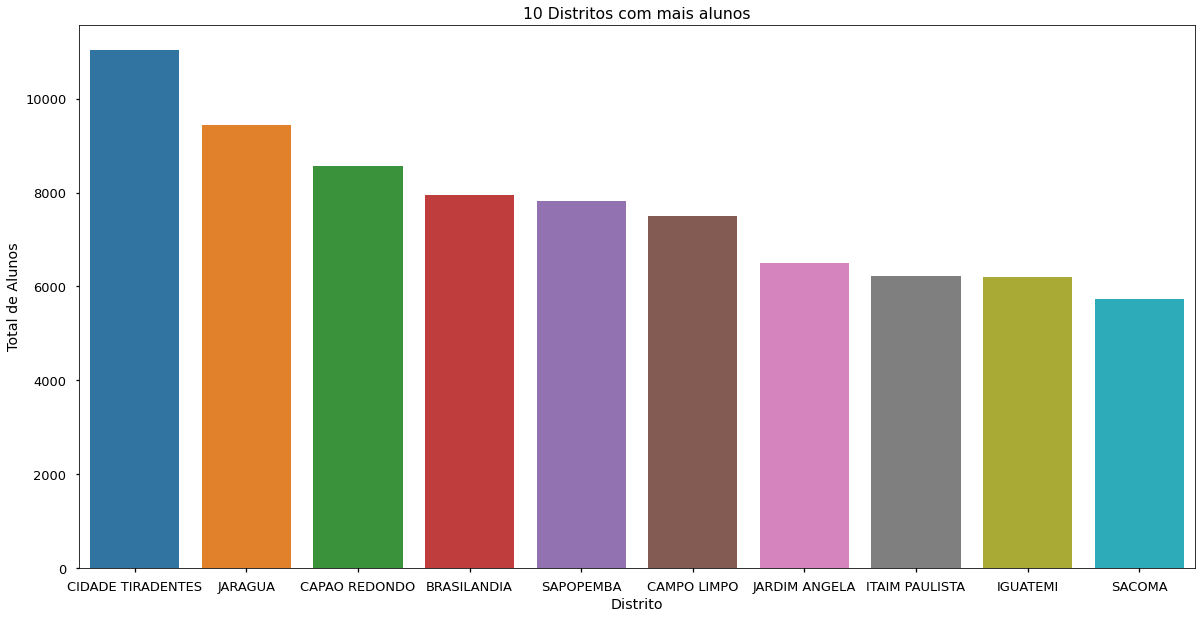

In [61]:
#Gráfico de barras dos distritos com mais alunos

#Separando os top 10 valores
distritos =df_p['NOME_DISTRITO'].value_counts().head(10)
distritos = distritos.reset_index()

sns.barplot(x=distritos['index'],y=distritos['NOME_DISTRITO'],data=distritos)
plt.rcParams['figure.figsize'] = [15, 10]
plt.title('10 Distritos com mais alunos')
plt.xlabel('Distrito')
plt.ylabel('Total de Alunos')
plt.show()

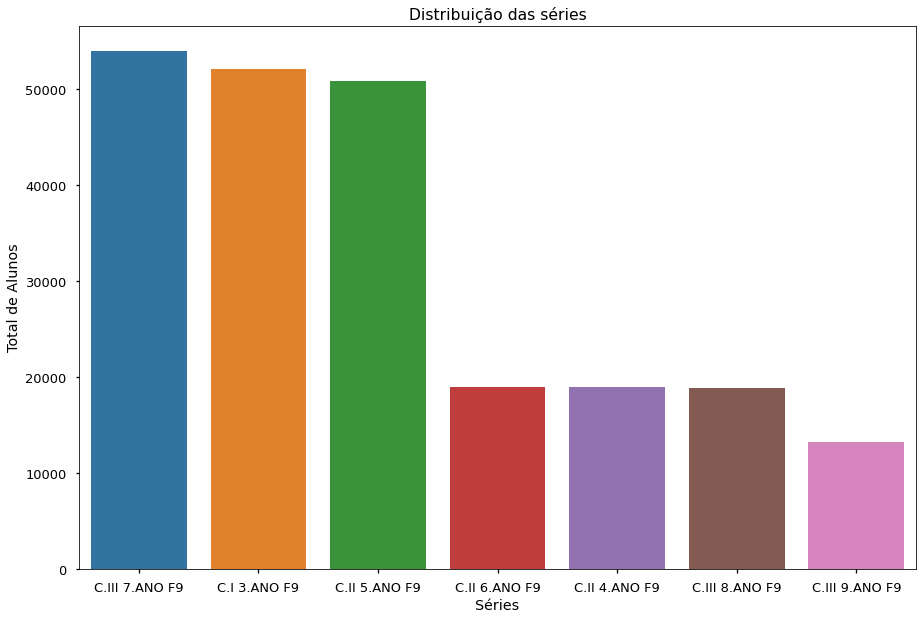

In [62]:
#Gráfico de barras com o total de alunos por séries
series = df_p['DESC_SERIE'].value_counts()
series = series.reset_index()

sns.barplot(x=series['index'],y=series['DESC_SERIE'],data=series)
plt.title('Distribuição das séries')
plt.xlabel('Séries')
plt.ylabel('Total de Alunos')
plt.show()

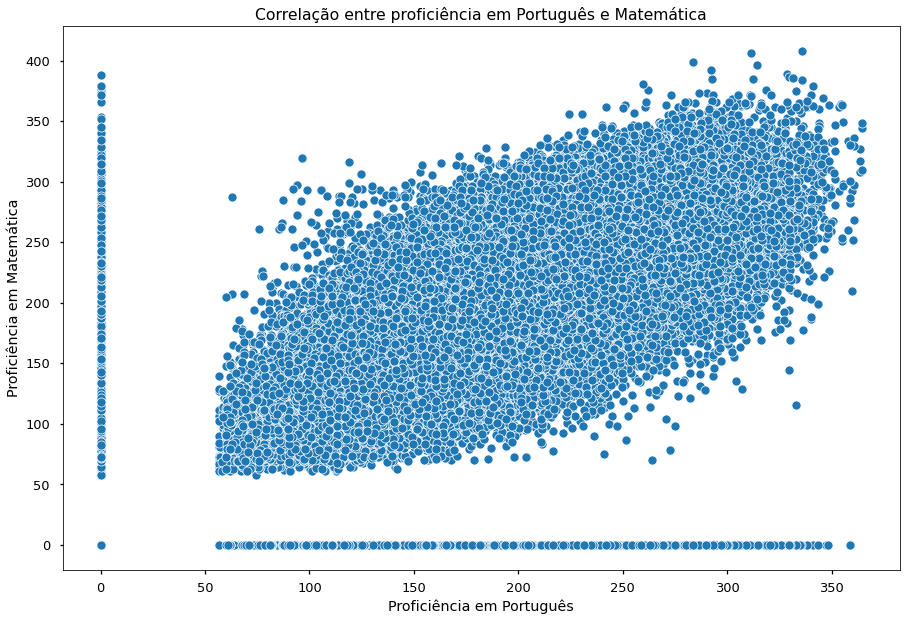

In [64]:
#Distribuição das notas de português e matemática
sns.scatterplot(x='PROFICIENCIA_LP',y='PROFICIENCIA_MAT',data=df_p)
plt.title('Correlação entre proficiência em Português e Matemática')
plt.xlabel('Proficiência em Português')
plt.ylabel('Proficiência em Matemática')
plt.show()

In [74]:
#Gráfico de barras das proeficiências nas provas
#Separando os dados
nivel_pro = nivel_pro.transpose()

ind = np.arange(len(nivel_pro))
adequado = nivel_pro.iloc[:,0]
basico = nivel_pro.iloc[:,1]
abaixo =nivel_pro.iloc[:,2]
avancado = nivel_pro.iloc[:,4]

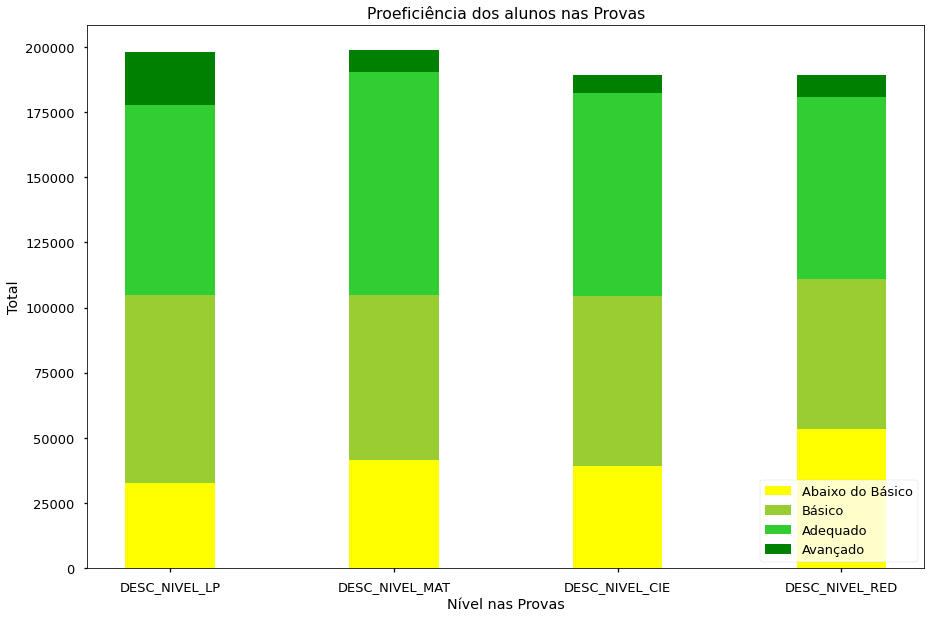

In [75]:
#Definindo as colunas e plotando o gráfico
aba = plt.bar(x=ind,height=abaixo,width=0.4,label='Abaixo do Básico',color='yellow')
bas = plt.bar(x=ind,height=basico,width=0.4,bottom=abaixo,label='Básico',color='yellowgreen')
ade = plt.bar(x=ind,height=adequado,width=0.4,bottom=abaixo+basico,label='Adequado',color='limegreen')
ava = plt.bar(x=ind,height=avancado,width=0.4,bottom=abaixo+basico+adequado,label='Avançado',color='green')
plt.xlabel('Nível nas Provas')
plt.ylabel('Total')
plt.title('Proeficiência dos alunos nas Provas')
plt.xticks(ind,nivel)
plt.legend()
plt.show()

### Etapa 3 - Preparando os datasets para junção 

Etapa 3.1 - Preparando a tabela da Prova SP

In [76]:
#Eliminando valores que não existem na tabela do IDEB (Tudo o que não for do Fund.1)
df_p = df_p[df_p.MODALIDADE != 'ESPEC']
print(df_p['MODALIDADE'].value_counts())
df_p = df_p[df_p.MODALIDADE_SEGMENTO != 'Fund2']
print(df_p['DESC_SERIE'].value_counts())

FUND    226398
Name: MODALIDADE, dtype: int64
C.I 3.ANO F9     52042
C.II 5.ANO F9    50822
C.II 4.ANO F9    18907
Name: DESC_SERIE, dtype: int64


In [77]:
#Excluindo colunas pouco relevantes
df_p = df_p.drop(['TIPO_ESCOLA','NOME_DISTRITO','MODALIDADE','MODALIDADE_SEGMENTO','IN_PRESENCA_LP','IN_PRESENCA_MAT',
                  'IN_PRESENCA_CIE','IN_PRESENCA_RED','ACERTOS_ALUNO_LP','ACERTOS_ALUNO_MAT','ACERTOS_ALUNO_CIE',
                  'PER_ALUNO_LP','PER_ALUNO_MAT','PER_ALUNO_CIE','NOTA_RED','DESC_NIVEL_LP','DESC_NIVEL_MAT',
                  'DESC_NIVEL_CIE','DESC_NIVEL_RED'],axis=1)

Etapa 3.2 - Preparando a tabela do Ideb

In [79]:
df_ideb = df.drop(['Sigla da UF','Nome do Município','DRE','Nome da Escola','Rede','taxa_aprov_1_a_5','taxa_aprov_1','taxa_aprov_2','taxa_aprov_3','taxa_aprov_4','taxa_aprov_5'],axis=1)
df_ideb = df_ideb.sort_values(by=['CD_UNIDADE_EDUCACAO'])

In [80]:
#Eliminando linha inexistente na tabela da prova sp
df_ideb = df_ideb.drop([148])

In [81]:
#Corrigindo o index
df_ideb = df_ideb.reset_index()
df_ideb = df_ideb.drop(['index'],axis=1)
print(df_ideb)

     CD_UNIDADE_EDUCACAO    NSE  indicador_rendimento_(P)  provabr_matematica  \
0                    108  54.43                      0.99              219.55   
1                    191  51.88                      0.96              216.51   
2                    264  50.48                      0.99              210.41   
3                    281  54.01                      0.94              225.32   
4                    299  55.70                      1.00              237.32   
..                   ...    ...                       ...                 ...   
550                99678  53.73                      0.99              219.73   
551                99686  53.81                      0.98              231.46   
552                99783  51.74                      0.96              219.38   
553                99791  53.71                      0.95              235.07   
554                99792  53.21                      1.00              214.10   

     provabr_portugues  pro

In [89]:
#Criando dataframe a partir das médias dos indicadores por unidades educacional
df_prova = pd.DataFrame(df_p.groupby(['CD_UNIDADE_EDUCACAO']).mean())
df_prova = df_prova.reset_index()
df_prova = df_prova.rename(columns={"CD_UNIDADE_EDUCACAO":'CD_UNIDADE_EDUCACAO1'})
print(df_prova)

     CD_UNIDADE_EDUCACAO1  PROFICIENCIA_LP  PROFICIENCIA_MAT  \
0                     108       163.721277        164.340426   
1                     191       170.849219        163.689844   
2                     264       144.929560        157.328302   
3                     281       174.895758        179.261212   
4                     299       181.270349        183.769186   
..                    ...              ...               ...   
550                 99678       170.983206        179.037405   
551                 99686       156.763102        164.684492   
552                 99783       145.876030        143.000749   
553                 99791       161.377308        160.125769   
554                 99792       164.324569        159.875000   

     PROFICIENCIA_CIE  NIVEL_LP  NIVEL_MAT  NIVEL_CIE  NIVEL_RED  
0          147.754787  2.388298   1.973404   1.760638   2.090426  
1          159.653906  2.414062   1.890625   1.820312   2.164062  
2          138.249686  2.10062

### Etapa 4 - Unindo os datasets

In [90]:
df_reg = pd.concat([df_ideb,df_prova],axis=1)
print(df_reg)

     CD_UNIDADE_EDUCACAO    NSE  indicador_rendimento_(P)  provabr_matematica  \
0                    108  54.43                      0.99              219.55   
1                    191  51.88                      0.96              216.51   
2                    264  50.48                      0.99              210.41   
3                    281  54.01                      0.94              225.32   
4                    299  55.70                      1.00              237.32   
..                   ...    ...                       ...                 ...   
550                99678  53.73                      0.99              219.73   
551                99686  53.81                      0.98              231.46   
552                99783  51.74                      0.96              219.38   
553                99791  53.71                      0.95              235.07   
554                99792  53.21                      1.00              214.10   

     provabr_portugues  pro

In [91]:
#Verificar se as unidades de educação batem
#Criando a função "se" do Excel
def teste(row):
    if row['CD_UNIDADE_EDUCACAO'] == row['CD_UNIDADE_EDUCACAO1']:
        return 1
    else:
        return 0

In [92]:
#Aplicando a função
df_reg['Teste'] = df_reg.apply(teste,axis=1)
print(df_reg['Teste'].value_counts())

1    454
0    101
Name: Teste, dtype: int64


In [93]:
#Exportar para verificar os erros no Excel
df_reg.to_csv('regressao.csv')

#### Observação: 
Foi exportado para o excel a tabela criada para verificação no número alto de erros no "batimento" entre os códigos das escolas das duas planilhas.
Dado que a tabela possui apenas 555 linhas, é possível realizar uma análise visual dos problemas.
                          Assim, foi possivel excluir apenas 3 linhas ao invés de 101.
Verifique a diferença entre a "regressao.csv" e "regressao.trab.csv";

### Etapa 5 - Trabalhando com o dataset final 

In [94]:
df_pronto = pd.read_csv("regressao.trab.csv", sep =";")
df_pronto = df_pronto.drop(['index','CD_UNIDADE_EDUCACAO'],axis=1)
print(df_pronto)

       NSE  indicador_rendimento_(P)  provabr_matematica  provabr_portugues  \
0    54.43                      0.99              219.55             204.56   
1    51.88                      0.96              216.51             215.81   
2    50.48                      0.99              210.41             200.59   
3    54.01                      0.94              225.32             219.49   
4    55.70                      1.00              237.32             227.63   
..     ...                       ...                 ...                ...   
547  53.73                      0.99              219.73             202.86   
548  53.81                      0.98              231.46             222.51   
549  51.74                      0.96              219.38             201.51   
550  53.71                      0.95              235.07             225.01   
551  53.21                      1.00              214.10             202.44   

     provabr_media_padronizada  IDEB_2015_(N x P)  

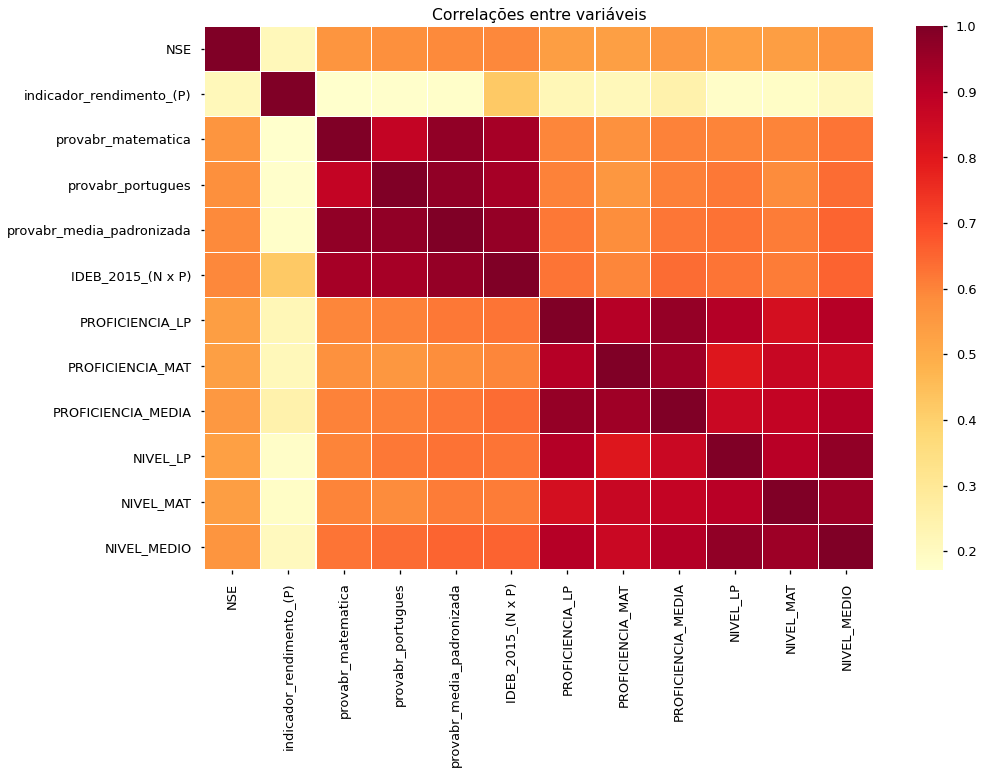

In [95]:
#Verificando a Correlação entre as novas variáveis
corr1 = df_pronto.corr()
sns.heatmap(corr1,cmap = "YlOrRd",linewidths=0.1)
plt.title('Correlações entre variáveis')
plt.show()

Verificando a correlação da distribuição entre as variáveis

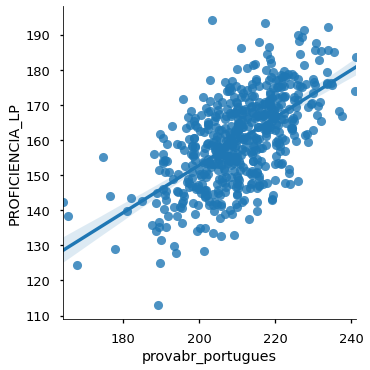

In [96]:
sns.lmplot(x='provabr_portugues',y='PROFICIENCIA_LP',data=df_pronto)
plt.show()

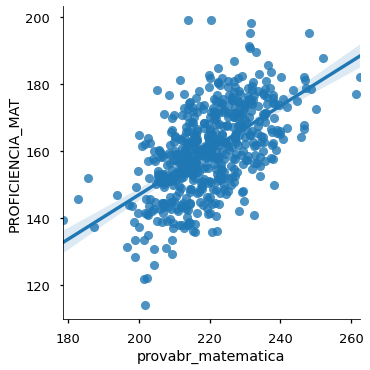

In [97]:
sns.lmplot(x='provabr_matematica',y='PROFICIENCIA_MAT',data=df_pronto)
plt.show()

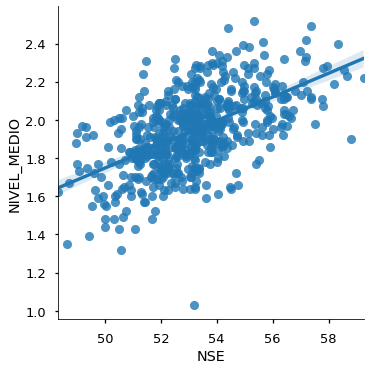

In [98]:
sns.lmplot(x='NSE',y='NIVEL_MEDIO',data=df_pronto)
plt.show()

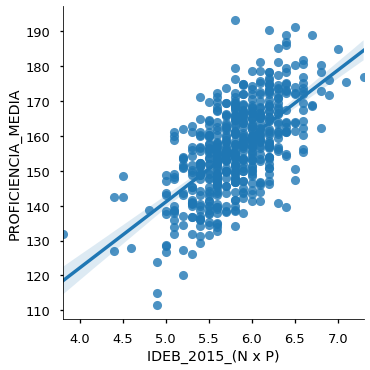

In [99]:
sns.lmplot(x='IDEB_2015_(N x P)',y='PROFICIENCIA_MEDIA',data=df_pronto)
plt.show()

### Etapa 6 - Algoritmo de Regressão Linear
O objetivo é verificar o quanto os indicadores de 2015 influenciam no resultados das escolas nas Provas SP em 2017

Etapa 6.1 - Regressão Linear Simples

In [100]:
#Importando os pacotes a serem usados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [101]:
#Selecionando as variáveis
X = df_pronto[['IDEB_2015_(N x P)']].values.reshape(-1,1)
Y = df_pronto[['NIVEL_MEDIO']].values.reshape(-1,1)

In [102]:
#Realizando o fit do modelo
linear = LinearRegression()
linear = linear.fit(X,Y)

[[1.93787567]
 [1.93787567]
 [1.87564608]
 [1.96899047]
 [2.18679404]]


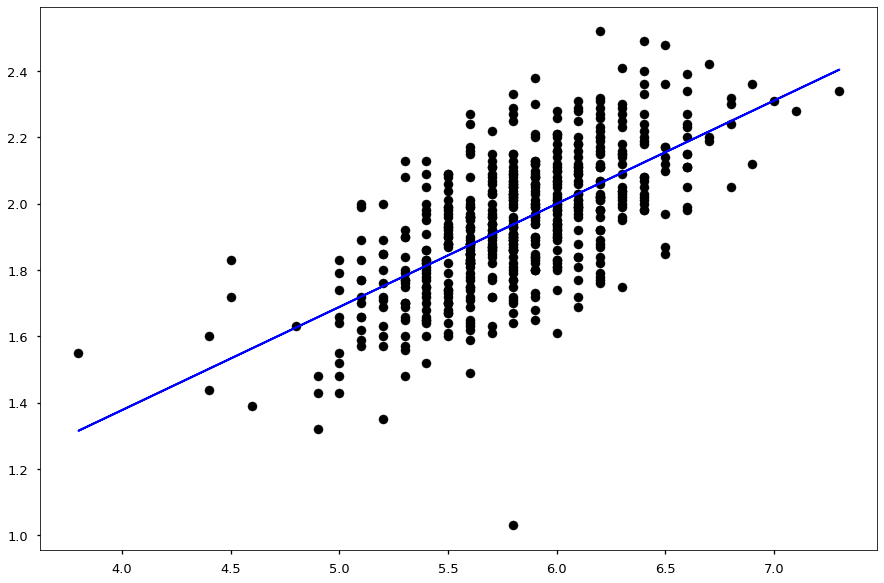

In [103]:
#Testando o modelo
predicoes = linear.predict(X)
print(predicoes[:5])
plt.scatter(x=df_pronto['IDEB_2015_(N x P)'],y=df_pronto['NIVEL_MEDIO'],c='black')
plt.plot(df_pronto['IDEB_2015_(N x P)'],predicoes,c='blue',linewidth=2)
plt.show()

In [105]:
#Verificando as predições
import statsmodels.api as sm
XX = sm.add_constant(X)
est = sm.OLS(Y,XX)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.11e-68
Time:                        19:41:00   Log-Likelihood:                 243.60
No. Observations:                 552   AIC:                            -483.2
Df Residuals:                     550   BIC:                            -474.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1332      0.090      1.488      0.1

O valor de P apresentado denota pouca significância estatística, vamos tentar outras variáveis explicativas.

In [106]:
#Selecionando as variáveis do 2º modelo
X1 = df_pronto[['provabr_media_padronizada']]
Y1 = df_pronto[['PROFICIENCIA_MEDIA']]

In [107]:
#Dividindo o data set
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,random_state=1)

In [108]:
#Realizando o fit do modelo
linear1 = LinearRegression()
linear1 = linear1.fit(x1_train,y1_train)

In [109]:
#Testando o modelo
predicoes1 = linear1.predict(x1_test)

In [110]:
#Verificando as predições
XA = sm.add_constant(X1)
estx = sm.OLS(Y1,XA)
estx2 = estx.fit()
print(estx2.summary())

                            OLS Regression Results                            
Dep. Variable:     PROFICIENCIA_MEDIA   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     349.3
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.02e-60
Time:                        19:45:21   Log-Likelihood:                -2053.2
No. Observations:                 552   AIC:                             4110.
Df Residuals:                     550   BIC:                             4119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Ao contrário do Ideb, a nota das provas influenciam um pouco menos a proficiencia das escolas, contudo apresenta significância próximo a 0.

In [111]:
#Selecionando as variáveis do 3º modelo
X2 = df_pronto[['NSE']]
Y2 = df_pronto[['PROFICIENCIA_MEDIA']]

In [112]:
#Dividindo o data set
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,Y2,random_state=1)

In [113]:
#Realizando o fit do modelo
linear2 = LinearRegression()
linear2 = linear2.fit(x2_train,y2_train)

In [114]:
#Testando o modelo
predicoes2 = linear2.predict(x2_test)

In [115]:
XB = sm.add_constant(X2)
esty = sm.OLS(Y2,XB)
esty2 = esty.fit()
print(esty2.summary())

                            OLS Regression Results                            
Dep. Variable:     PROFICIENCIA_MEDIA   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           3.09e-46
Time:                        21:00:22   Log-Likelihood:                -2086.5
No. Observations:                 552   AIC:                             4177.
Df Residuals:                     550   BIC:                             4186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.5832     12.868     -3.542      0.0

O nível socioeconômico apresenta significância e impacto menor no resultado das provas do que a nota da Prova Brasil.

Etapa 6.2 - Regressão Linear Multivariada

In [116]:
#Fazendo regressão linear multivariada
X3 = df_pronto[['NSE','indicador_rendimento_(P)','provabr_media_padronizada']]
Y3 = df_pronto[['PROFICIENCIA_MEDIA']]

In [117]:
linearm = LinearRegression()
linearm = linearm.fit(X3,Y3)

In [119]:
#Verificando as predições
import statsmodels.api as sm

In [120]:
A = sm.add_constant(X3)
est0 = sm.OLS(Y3,A)
est00 = est0.fit()
print(est00.summary())

                            OLS Regression Results                            
Dep. Variable:     PROFICIENCIA_MEDIA   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           9.22e-72
Time:                        21:06:57   Log-Likelihood:                -2021.6
No. Observations:                 552   AIC:                             4051.
Df Residuals:                     548   BIC:                             4068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Fim
Conseguimos delimitar variáveis que explicam as notas da Prova SP. Assim, as notas das escolas conseguem se manter ao longo do tempo, nesse caso 2 anos, e possui entre os melhores indicadores aqueles que excluem o Ideb.
Seriam necessários estudos mais aprofundados para compreender porque o Ideb possui pouca relação com as notas das escolas.